# <h1>PREPROCESSING</h1>

## <h3>UPLOAD DATA</h3>

In [2]:
import pandas as pd
from binance.client import Client
from datetime import datetime, timedelta

api_key = 'Il7AIrG7k1CaXawPKVMSQAaiWEcYpIOswKzZIuObVPN3oO8JQEatLBHbkSzNk4ER'
secret_key = 'cEhGHkIuzgpoWmoiZuYrp8UEdNLb4Oh01pshY0xWOD3yOi0lruycCbdDm4t0Ap4H'

client = Client(api_key, secret_key)

start_date = "1 Jan, 2020"
end_date = "1 Feb, 2024"

# Convierte las cadenas de fecha en objetos datetime
start_date = datetime.strptime(start_date, '%d %b, %Y')
end_date = datetime.strptime(end_date, '%d %b, %Y')

# Obtener datos históricos de velas (candlesticks)
candlesticks = []
new_candles = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_15MINUTE, start_date.strftime('%d %b, %Y'), end_date.strftime('%d %b, %Y'), limit=1000)
candlesticks += new_candles



In [3]:
# Crear un DataFrame de Pandas
columns = ['open_time', 'Open', 'High', 'Low', 'Close', 'Volume', 'close_time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(candlesticks, columns=columns)

In [4]:
# Convertir fechas de milisegundos a formato legible
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

# Asegúrate de que los datos estén ordenados por fecha
df.sort_values('open_time', inplace=True)

# Crear un índice temporal único (time_idx)
df['time_idx'] = range(len(df))

df['series_id'] = 'default_series'

In [5]:
import talib
import pandas as pd

# Asumiendo que df es tu DataFrame y ya tiene las columnas 'Open', 'High', 'Low', 'Close', y 'Volume'

# Calcula el Simple Moving Average (SMA) de los precios de cierre
df['SMA_10'] = talib.SMA(df['Close'], timeperiod=5)  # SMA de 10 periodos

# 1. EMA de periodos cortos:
df['EMA_3'] = talib.EMA(df['Close'], timeperiod=3)
df['EMA_5'] = talib.EMA(df['Close'], timeperiod=5)

# Calcula el Relative Strength Index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=5)

# Calcula el MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=3, slowperiod=5, signalperiod=2)

# Calcula el Average True Range (ATR)
df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=5)

# Calcula el On Balance Volume (OBV)
df['OBV'] = talib.OBV(df['Close'], df['Volume'])

# Patrones de velas japonesas
df['DOJI'] = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])
df['HAMMER'] = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
df['INV_HAMMER'] = talib.CDLINVERTEDHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
df['SHOOTING_STAR'] = talib.CDLSHOOTINGSTAR(df['Open'], df['High'], df['Low'], df['Close'])
df['HANG_MAN'] = talib.CDLHANGINGMAN(df['Open'], df['High'], df['Low'], df['Close'])
df['ENGULFING'] = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])

## <h3>VISUALIZATION</h3> 

In [4]:
df.shape

(143080, 27)

In [11]:
df.tail(71500)

,open_time,Open,High,Low,Close,Volume,close_time,Quote asset volume,Number of trades,Taker buy base asset volume,...,ATR,OBV,DOJI,HAMMER,INV_HAMMER,SHOOTING_STAR,HANG_MAN,ENGULFING,time_idx,series_id
71580,2022-01-17 04:00:00,42647.40000000,42736.16000000,42601.00000000,42728.09,331.91948000,2022-01-17 04:14:59.999,14160266.37020220,11196,161.94207000,...,125.124726,150081.459427,0,0,0,0,0,0,71500,default_series
71581,2022-01-17 04:15:00,42728.09000000,42807.95000000,42689.50000000,42780.93,307.49196000,2022-01-17 04:29:59.999,13147678.87797910,11189,174.37326000,...,124.679744,150388.951387,0,0,0,0,0,0,71501,default_series
71582,2022-01-17 04:30:00,42780.94000000,42784.95000000,42628.01000000,42684.66,372.48945000,2022-01-17 04:44:59.999,15905950.29573330,13327,224.84339000,...,126.830428,150016.461937,0,0,0,0,0,-100,71502,default_series
71583,2022-01-17 04:45:00,42684.65000000,42747.92000000,42615.55000000,42622.99,226.10223000,2022-01-17 04:59:59.999,9651887.15643650,8530,112.18195000,...,127.199732,149790.359707,0,0,100,0,0,0,71503,default_series
71584,2022-01-17 05:00:00,42622.99000000,42625.49000000,42300.00000000,42401.27,798.99991000,2022-01-17 05:14:59.999,33911781.92508840,22971,339.82083000,...,140.419084,148991.359797,0,0,0,0,0,0,71504,default_series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143075,2024-01-31 23:00:00,42656.07000000,42681.28000000,42574.40000000,42588.39,699.58621000,2024-01-31 23:14:59.999,29824597.21813650,11356,319.77722000,...,198.381254,462254.073455,0,0,0,0,0,0,142995,default_series
143076,2024-01-31 23:15:00,42588.38000000,42649.67000000,42555.46000000,42637.87,224.83904000,2024-01-31 23:29:59.999,9581903.07889760,7533,126.49664000,...,191.436504,462478.912495,0,0,0,0,0,0,142996,default_series
143077,2024-01-31 23:30:00,42637.87000000,42688.88000000,42605.23000000,42619.99,180.98081000,2024-01-31 23:44:59.999,7715783.08681610,7621,102.51531000,...,184.250737,462297.931685,0,0,0,0,0,0,142997,default_series
143078,2024-01-31 23:45:00,42620.00000000,42642.22000000,42580.00000000,42580.00,152.52184000,2024-01-31 23:59:59.999,6499700.17232010,6137,67.36985000,...,176.115354,462145.409845,0,0,0,0,0,0,142998,default_series


## <h3>CLEAN DATA</h3>

In [6]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

In [7]:
# Eliminar filas donde todos los valores son NaN
df.dropna(inplace=True)

In [8]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# 1. Calculate the number of rows to remove:
current_rows = df.shape[0]
remainder = current_rows % 100
rows_to_remove = remainder

# 2. Perform random undersampling:
if rows_to_remove > 0:
    df = df.tail(current_rows - rows_to_remove)  # Set random_state for reproducibility

# Now your df.shape[0] should be a multiple of 100 
print(df.shape)

(143000, 29)


In [22]:
hola = round(df.shape[0] / 2)

df = df.tail(150000)

# <h1>MODEL</h1>

## <h3>IMPLEMENTATION</h3>

In [9]:

from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.tuner import Tuner
from pytorch_forecasting import TimeSeriesDataSet

In [26]:
import numpy as np

# Crear un TimeSeriesDataSet
max_prediction_length = 3  # predecir la próxima vela
max_encoder_length = 60  # usar las últimas 60 velas para predecir
training_cutoff = np.datetime64("2022-01-17 05:15:00")
training = TimeSeriesDataSet(
	df[lambda x: x.open_time < training_cutoff],
    time_idx="time_idx",
    target="Close",
    group_ids=["series_id"],
    min_encoder_length=1,  # Ajusta según tu caso de uso
    max_encoder_length=5,  # Suponiendo que usas las últimas 60 velas para predecir
    min_prediction_length=1,
    max_prediction_length=1,  # Suponiendo que quieres predecir las siguientes 3 velas
    static_categoricals=[],
    static_reals=[],
    time_varying_known_categoricals=[],
    time_varying_known_reals=["Open", "High", "Low", "Volume", "SMA_10", "EMA_3", "EMA_5", "RSI", "MACD", "ATR", "OBV", "DOJI", "HAMMER", "INV_HAMMER", "SHOOTING_STAR", "HANG_MAN", "ENGULFING"],
    time_varying_unknown_reals=["Close"],
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

In [27]:
validation = TimeSeriesDataSet.from_dataset(training, df, min_prediction_idx=training.index.time.max() + 1, stop_randomization=True)
batch_size = 100  # Ajustar según las necesidades y la capacidad de tu máquina
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=2)

In [24]:
print(validation)

TimeSeriesDataSet[length=71500](
	time_idx='time_idx',
	target='Close',
	group_ids=['series_id'],
	weight=None,
	max_encoder_length=5,
	min_encoder_length=1,
	min_prediction_idx=71584,
	min_prediction_length=1,
	max_prediction_length=1,
	static_categoricals=[],
	static_reals=['encoder_length', 'Close_center', 'Close_scale'],
	time_varying_known_categoricals=[],
	time_varying_known_reals=['Open', 'High', 'Low', 'Volume', 'SMA_10', 'EMA_3', 'EMA_5', 'RSI', 'MACD', 'ATR', 'OBV', 'DOJI', 'HAMMER', 'INV_HAMMER', 'SHOOTING_STAR', 'HANG_MAN', 'ENGULFING', 'relative_time_idx'],
	time_varying_unknown_categoricals=[],
	time_varying_unknown_reals=['Close'],
	variable_groups={},
	constant_fill_strategy={},
	allow_missing_timesteps=False,
	lags={},
	add_relative_time_idx=True,
	add_target_scales=True,
	add_encoder_length=True,
	target_normalizer=GroupNormalizer(
	method='standard',
	groups=[],
	center=True,
	scale_by_group=False,
	transformation='relu',
	method_kwargs={}
),
	categorical_encoders={'

## <h3>TRAINING THE MODEL</h3>

In [34]:
from pytorch_forecasting import TemporalFusionTransformer
import pytorch_forecasting
import lightning.pytorch as pl
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning.loggers import TensorBoardLogger


# define trainer with early stopping
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
logger = TensorBoardLogger("marxIA", name="Transformer_prices")
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="auto",
    gradient_clip_val=0.1,
    limit_train_batches=64,
    callbacks=[early_stop_callback],
	logger=logger,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.0006100390035522301,
    hidden_size=64,
    attention_head_size=2,
    dropout=0.1,
    hidden_continuous_size=32,
    loss=pytorch_forecasting.metrics.point.MAPE(reduction='mean'),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    optimizer="AdamW",
    reduce_on_plateau_patience=2,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [29]:
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Number of parameters in network: 503.8k


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
Finding best initial lr:  64%|██████▍   | 64/100 [00:11<00:06,  5.89it/s]d:\Programas\Anaconda\envs\myenv\lib\site-packages\pytorch_forecasting\models\base_model.py:1016: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots

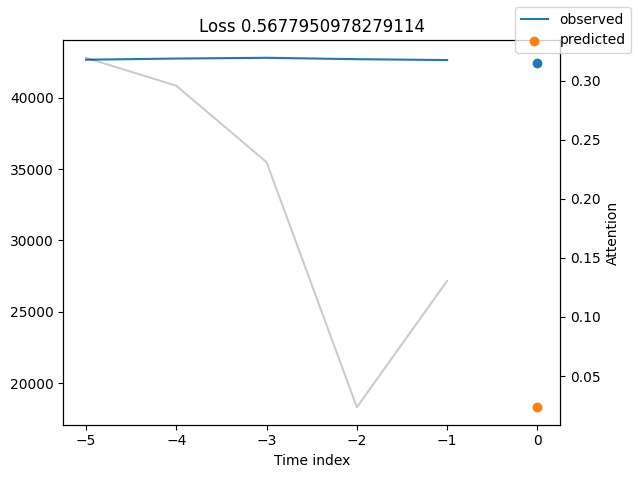

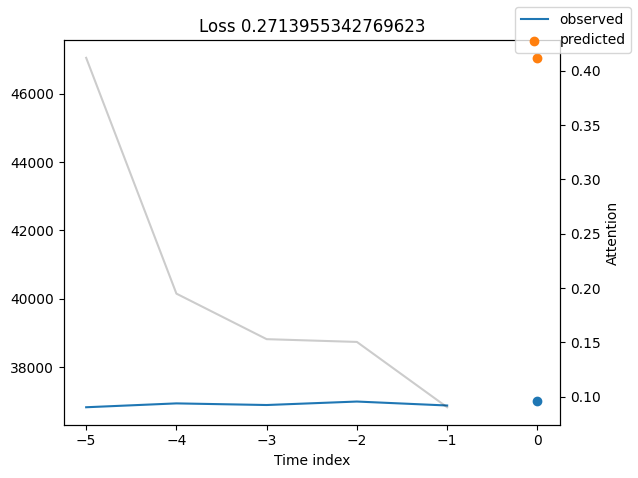

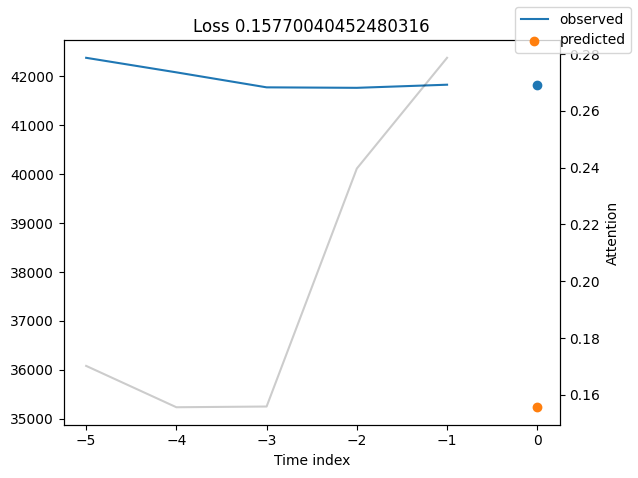

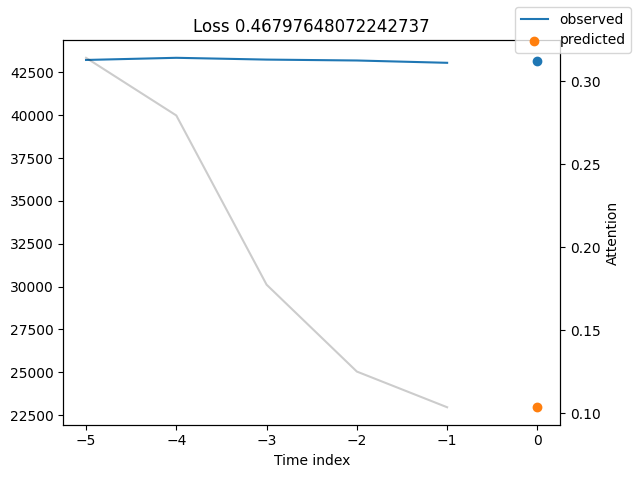

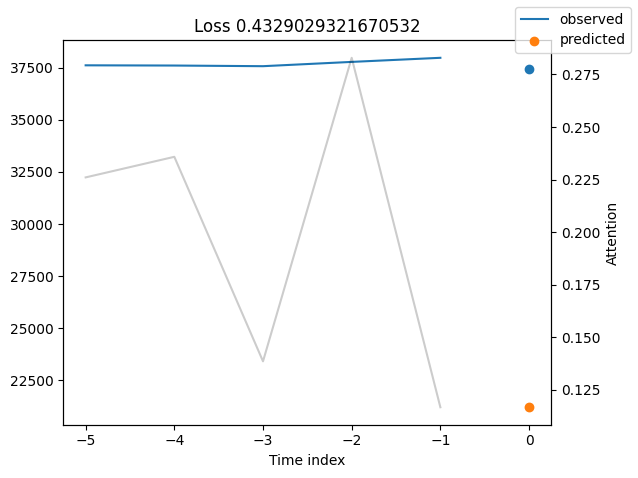

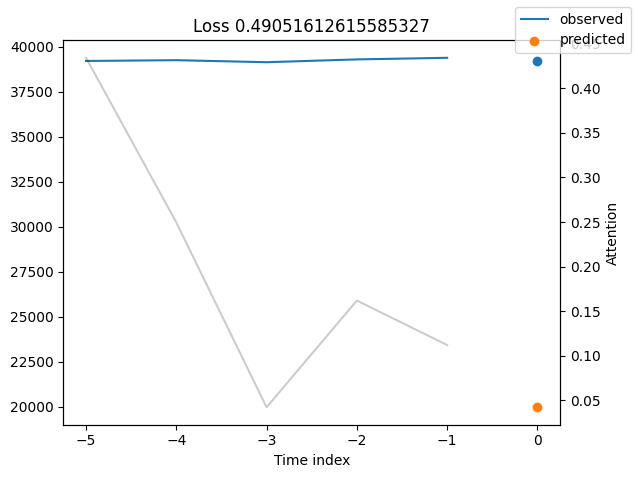

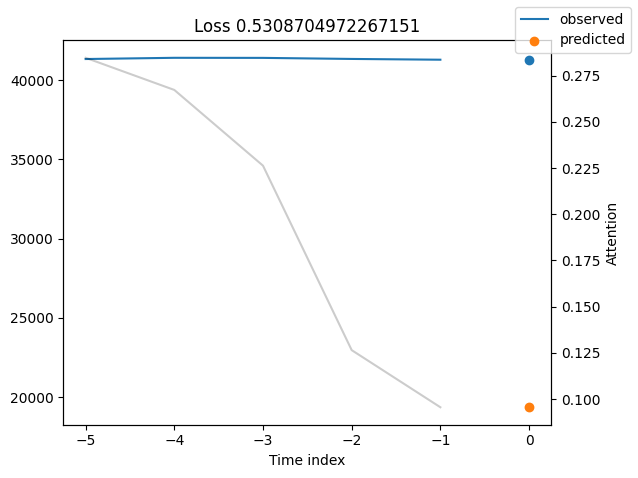

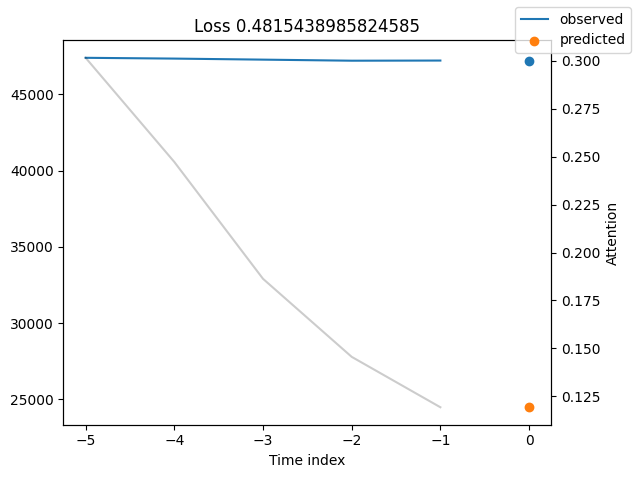

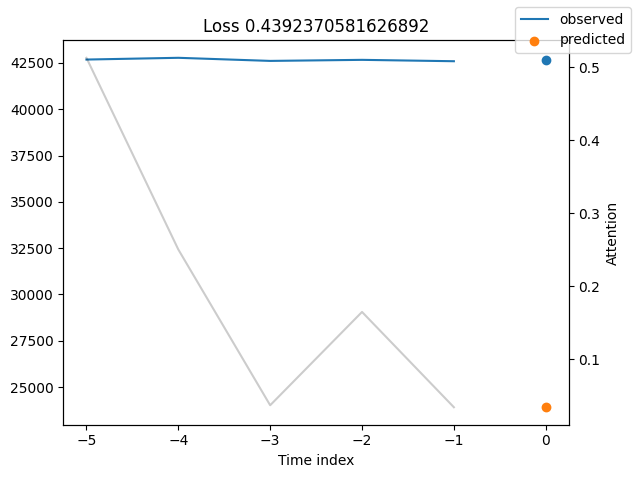

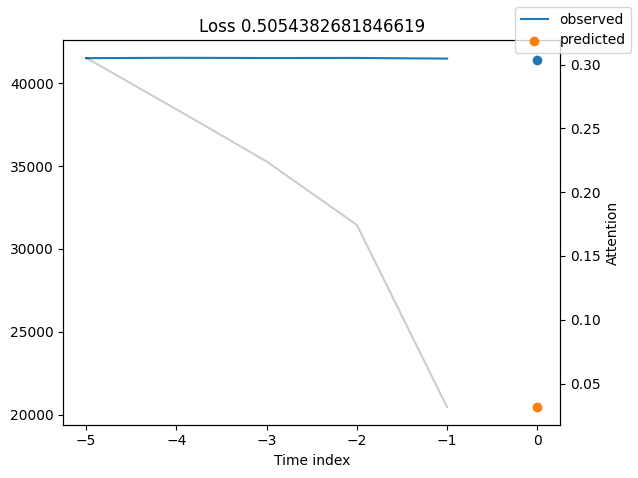

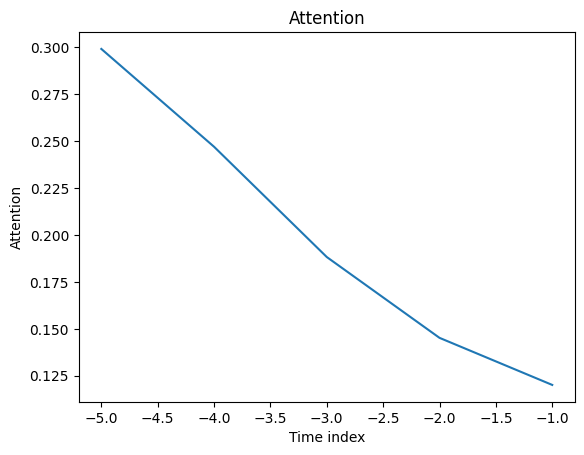

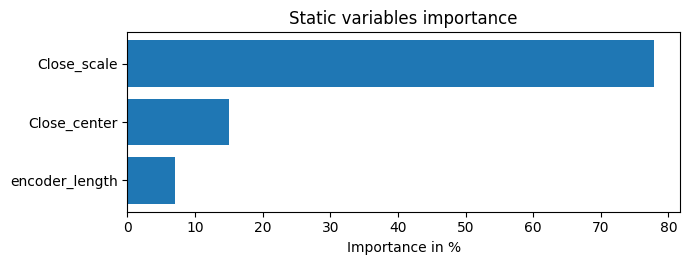

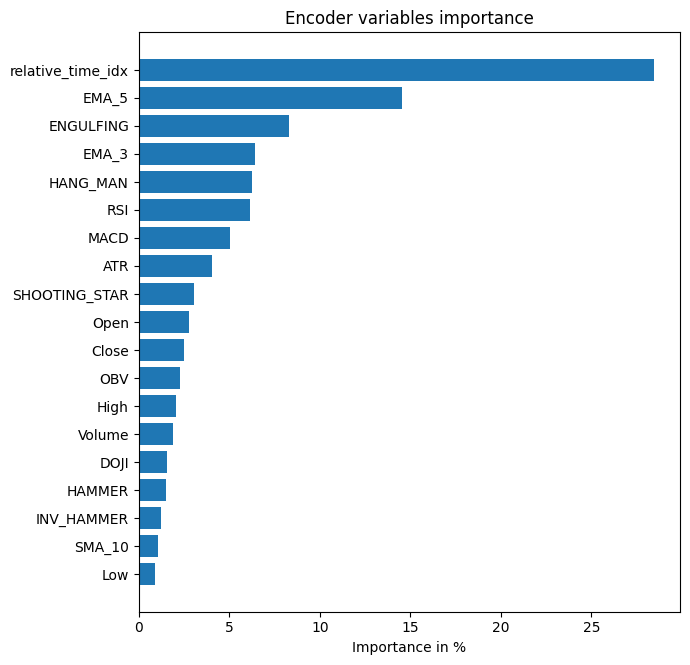

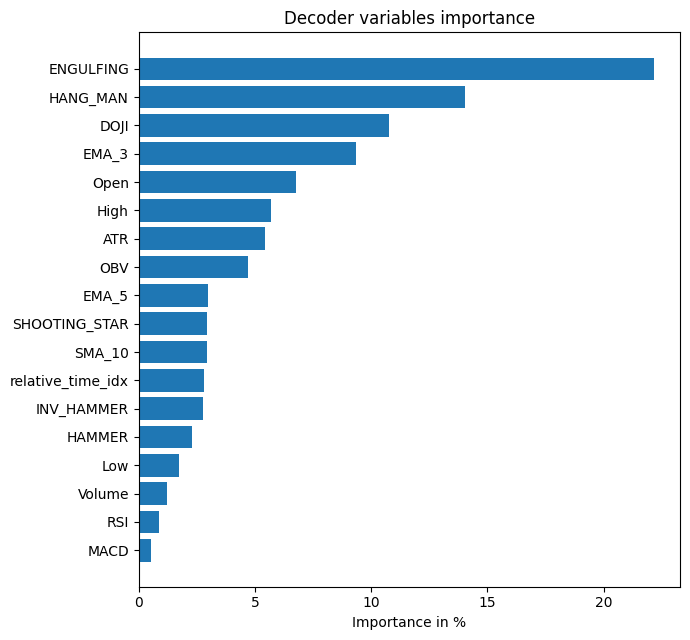

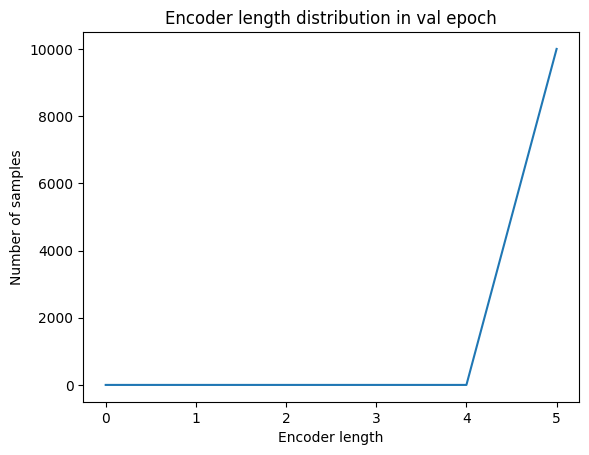

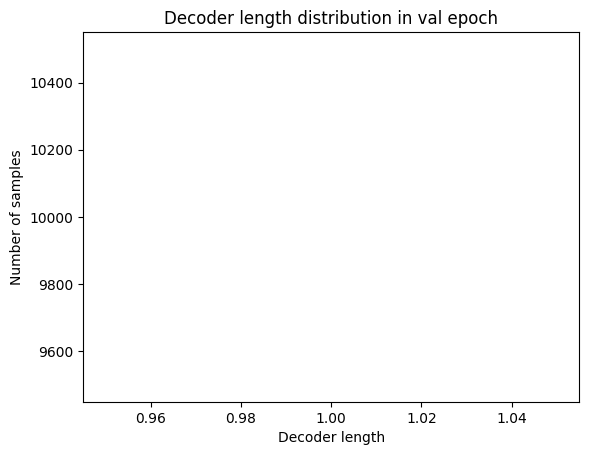

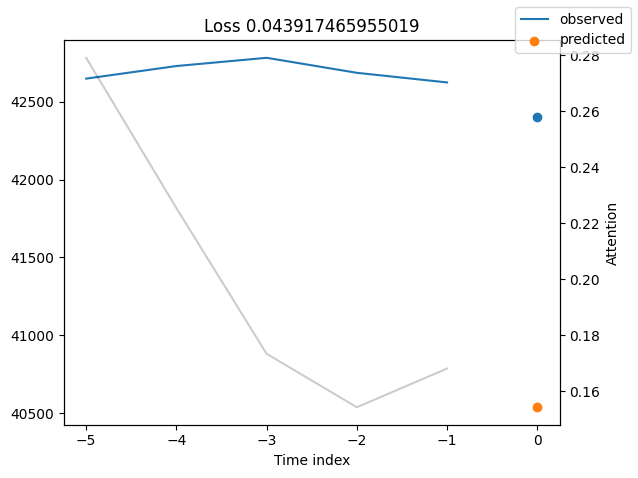

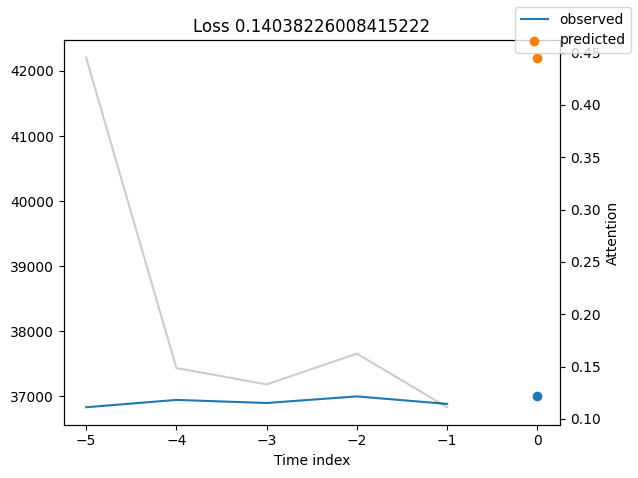

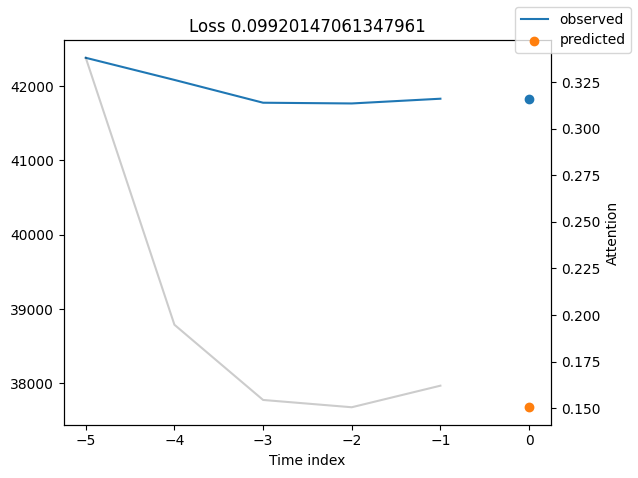

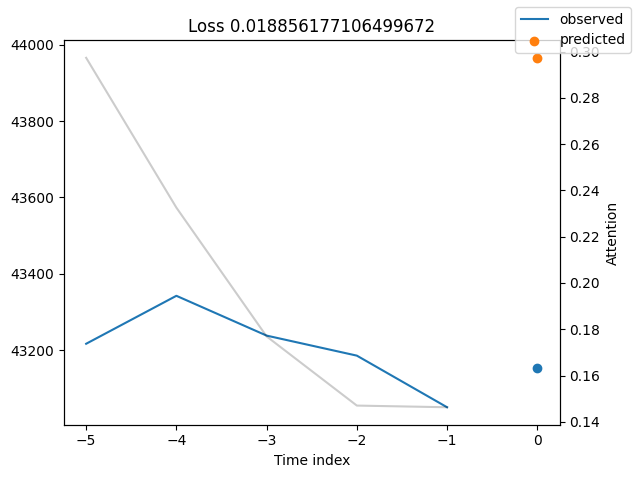

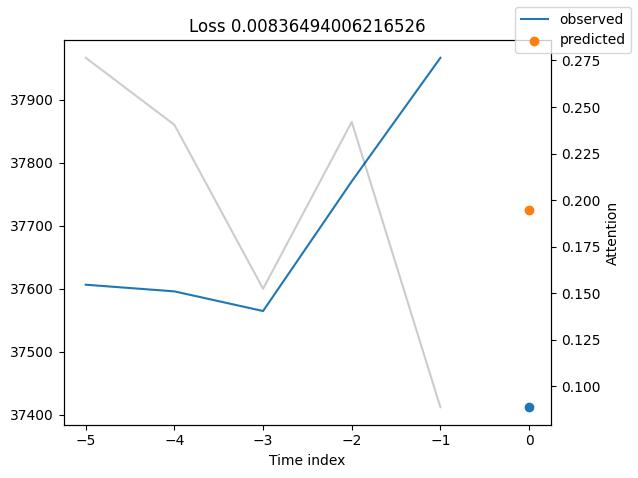

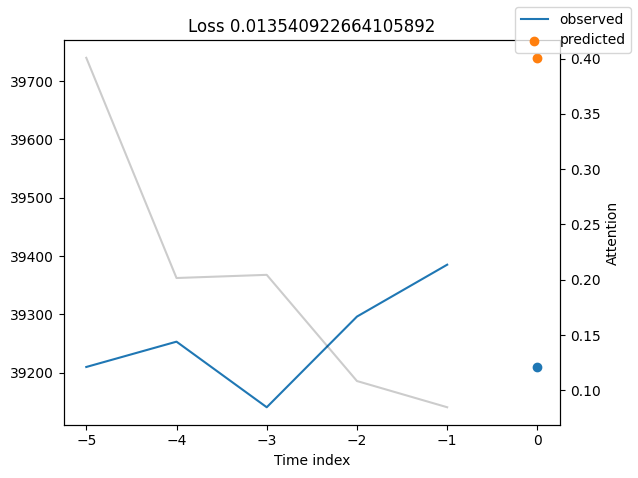

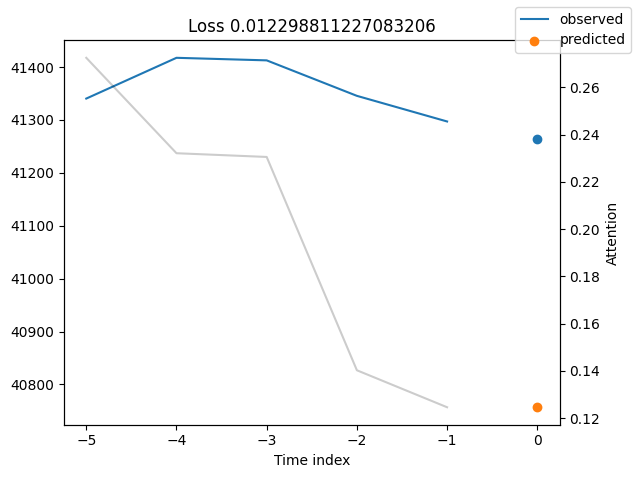

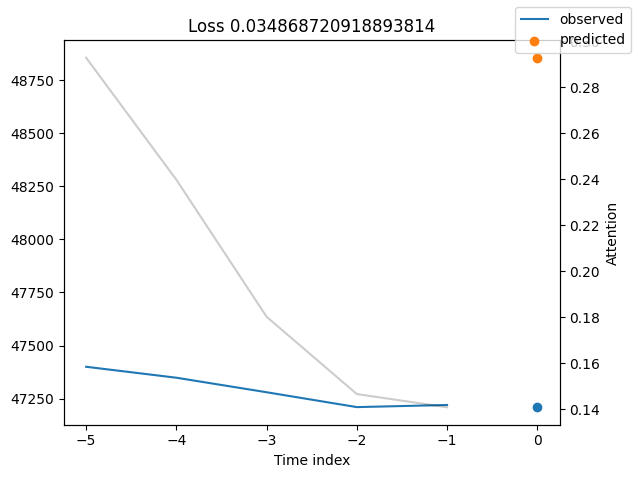

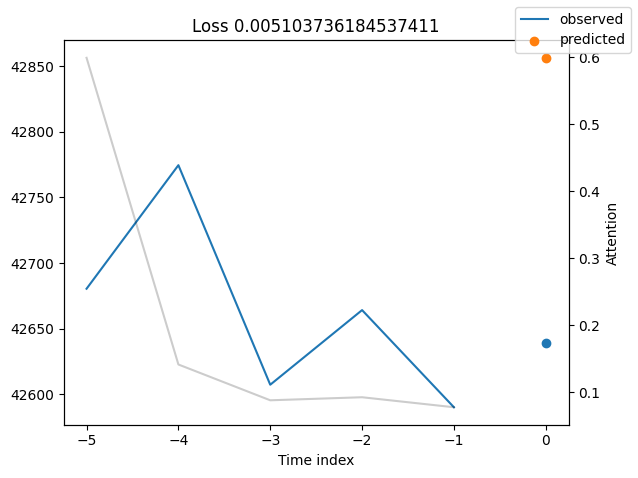

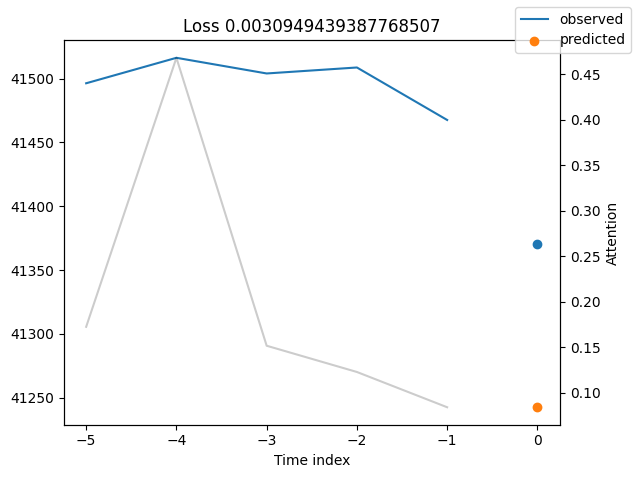

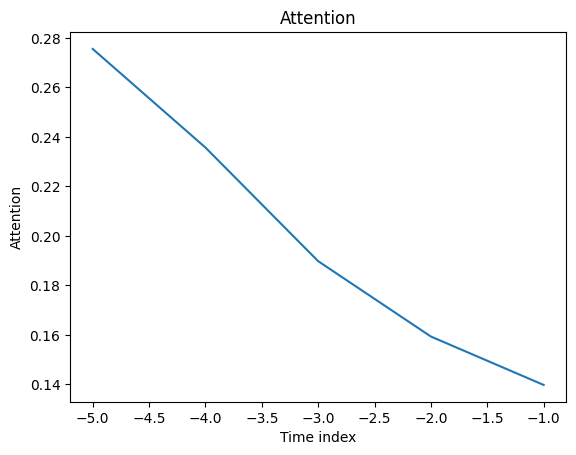

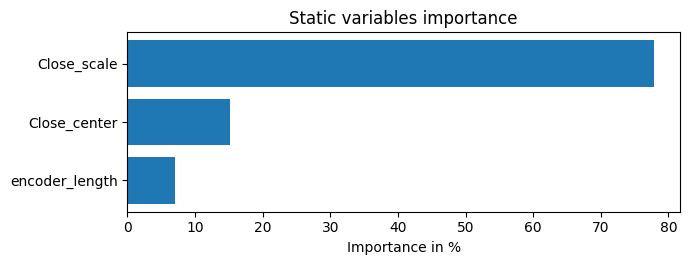

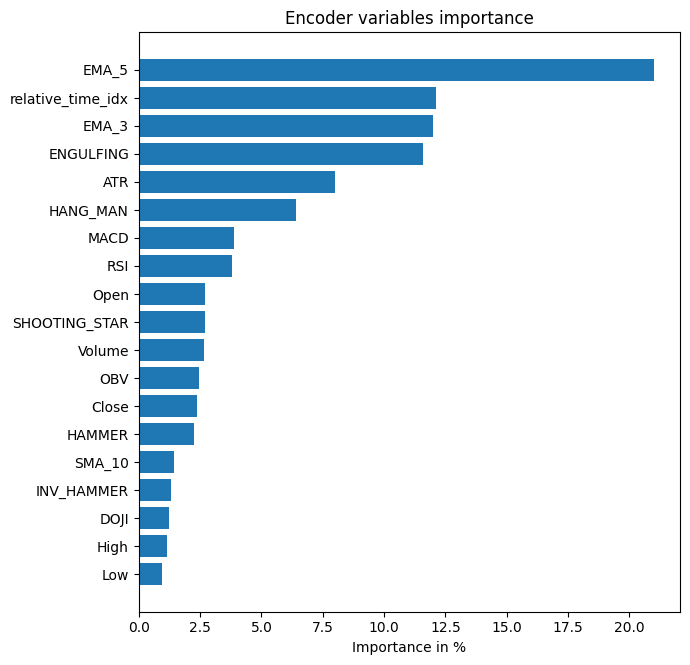

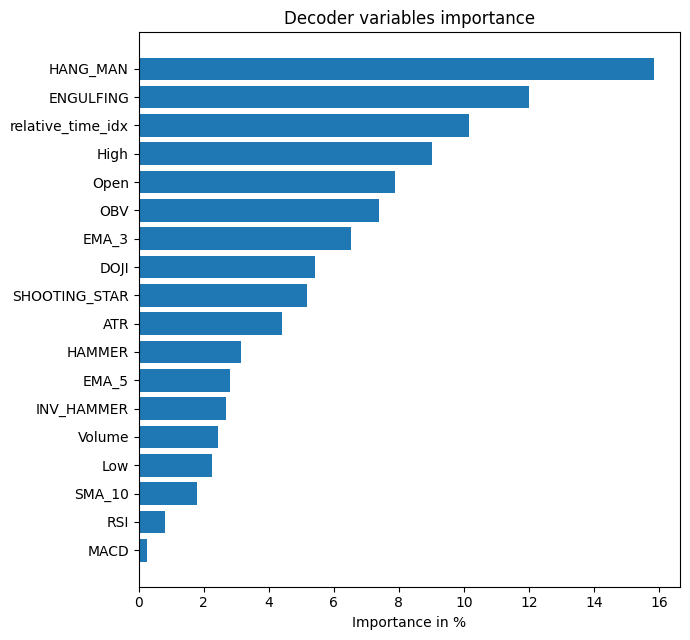

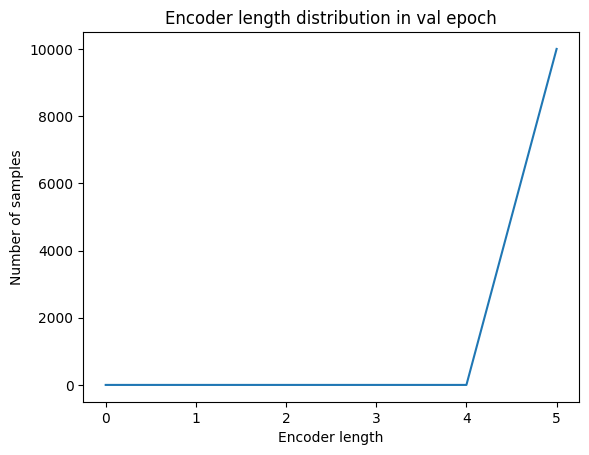

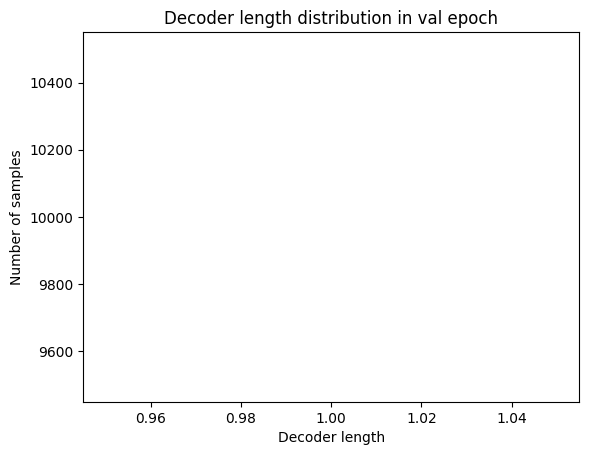

In [30]:
# find optimal learning rate (set limit_train_batches to 1.0 and log_interval = -1)
res = Tuner(trainer).lr_find(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, early_stop_threshold=1000.0, max_lr=0.3,
)

suggested learning rate: 0.0006100390035522301


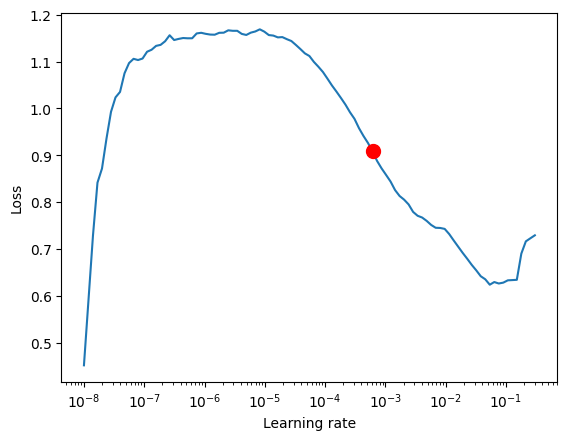

C:\Users\isrip\AppData\Local\Temp\ipykernel_13528\3284506899.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [31]:
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [35]:
# fit the model
trainer.fit(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | MAPE                            | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 1.4 K 
4  | static_variable_selection          | VariableSelectionNetwork        | 20.5 K
5  | encoder_variable_selection         | VariableSelectionNetwork        | 141 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 133 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 16.8 K
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 16.8 K
9  | static_context_initial_cell_lstm 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 7:   0%|          | 0/64 [00:00<?, ?it/s, v_num=36, train_loss_step=0.0225, val_loss=0.0141, train_loss_epoch=0.0261]         

d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000022085E90310>
Traceback (most recent call last):
  File "d:\Programas\Anaconda\envs\myenv\lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "d:\Programas\Anaconda\envs\myenv\lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


## <h3>EVALUTION</h3>

In [1]:
from pytorch_forecasting import TemporalFusionTransformer

best_tft = TemporalFusionTransformer.load_from_checkpoint("E:\VIDA PROFESIONAL\PROYECTS\marxIA\TrainModels\\marxIA\Transformer_prices\\version_34\checkpoints\epoch=55-step=3584.ckpt")

d:\Programas\Anaconda\envs\myenv\lib\site-packages\pytorch_forecasting\models\base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [ ]:
# calcualte mean absolute error on validation set
from pytorch_forecasting import MAE


predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="auto"))
MAE()(predictions.output, predictions.y)

In [13]:
import torch  # Assuming necessary imports

# ... (Your model definition and training code)

# Calculate predictions with raw output
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.


d:\Programas\Anaconda\envs\myenv\lib\site-packages\pytorch_forecasting\models\base_model.py:1016: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


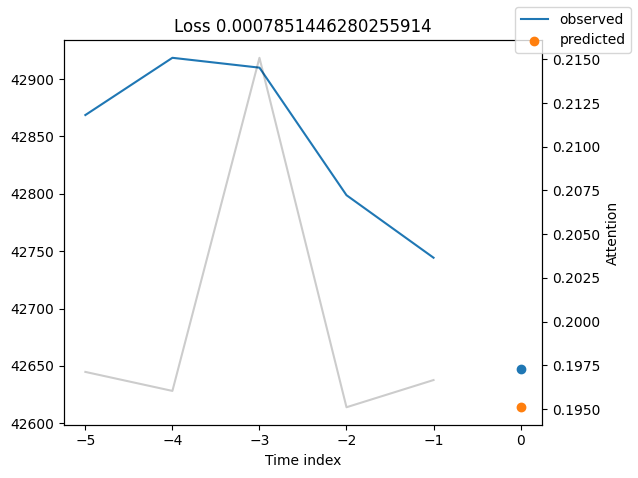

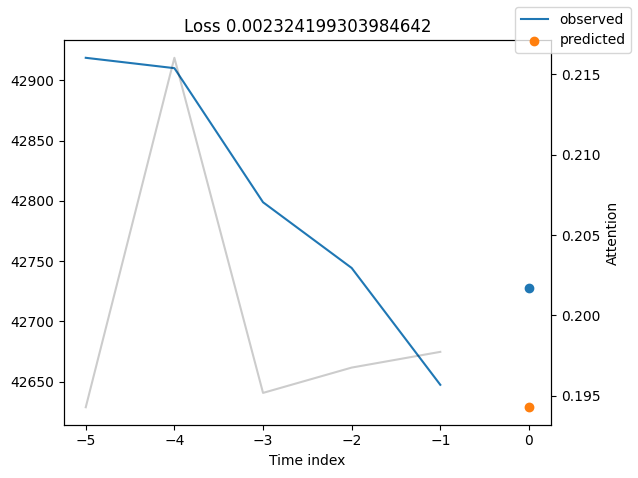

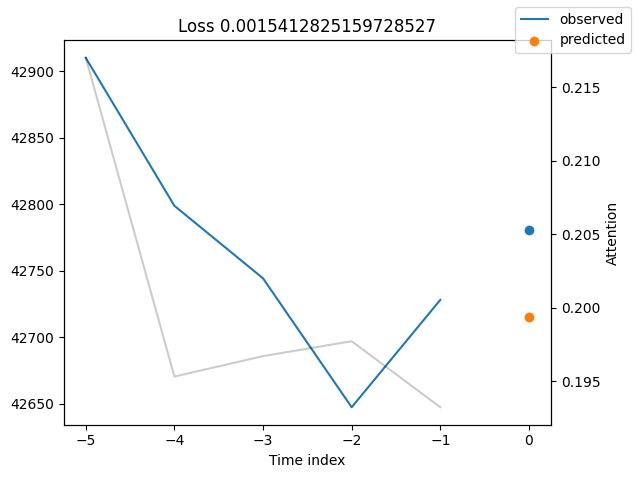

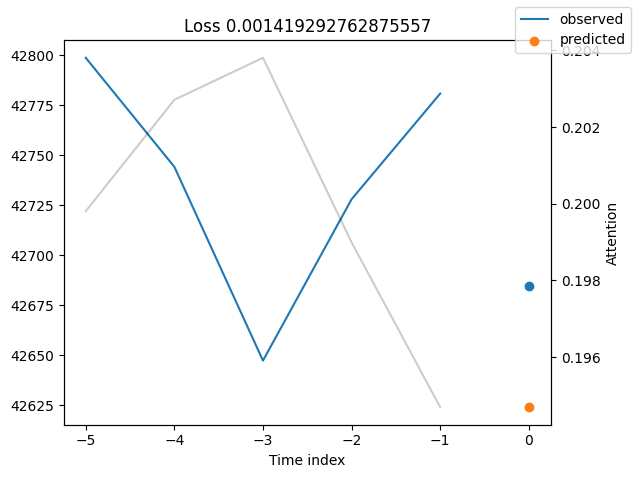

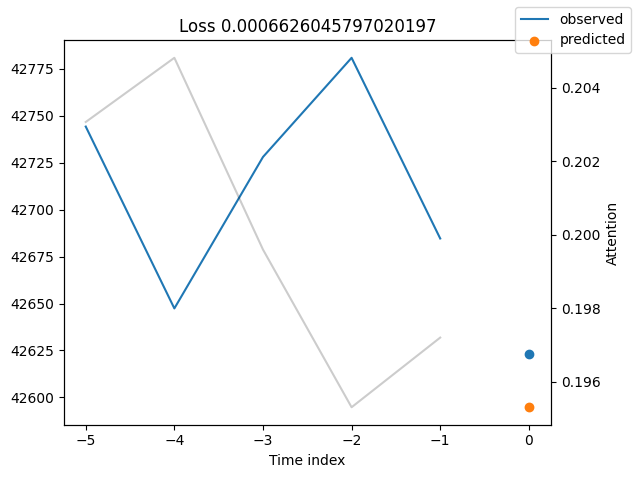

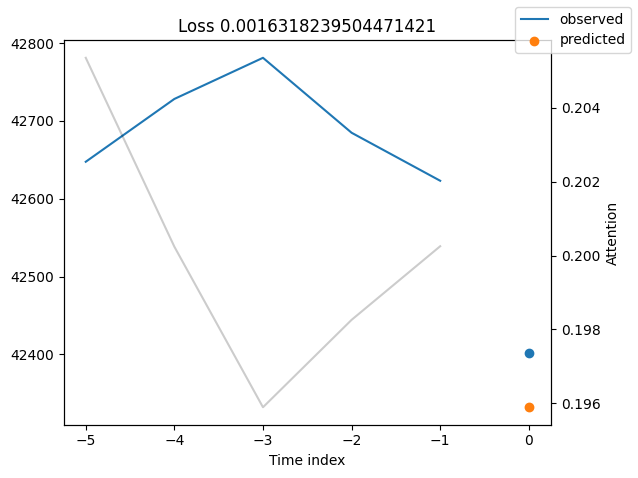

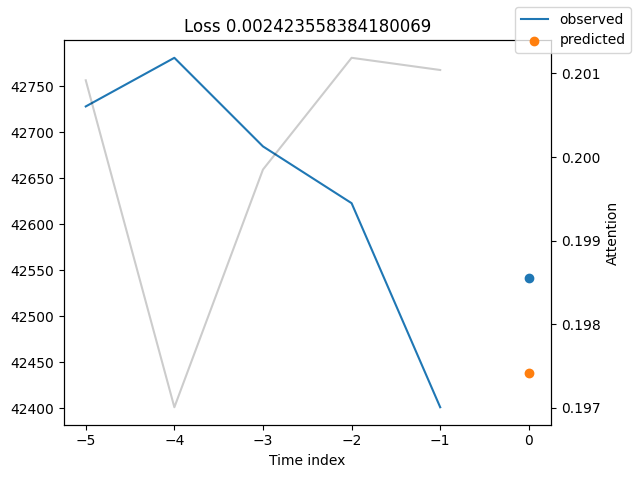

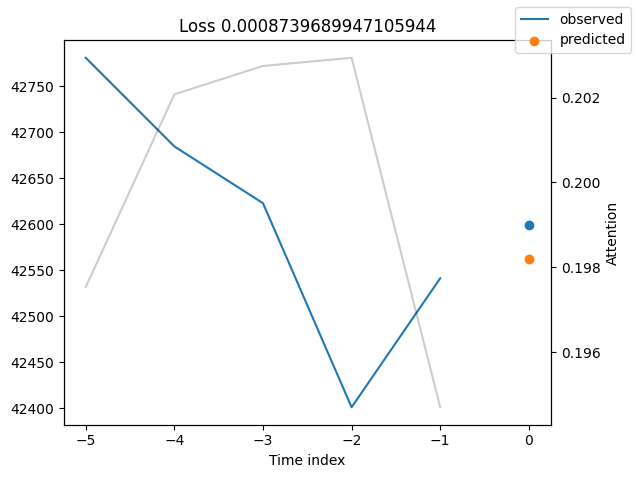

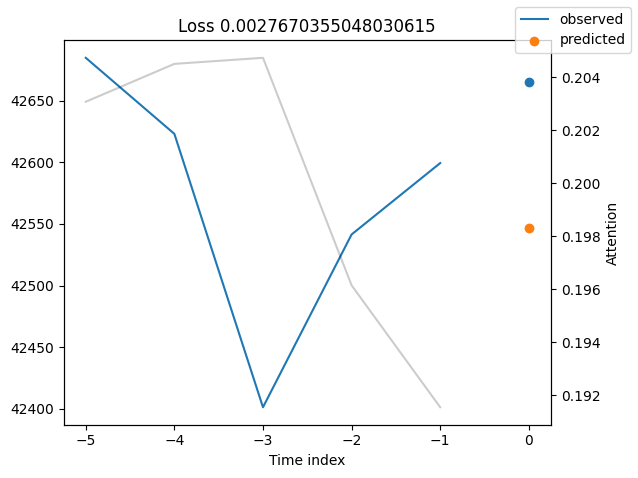

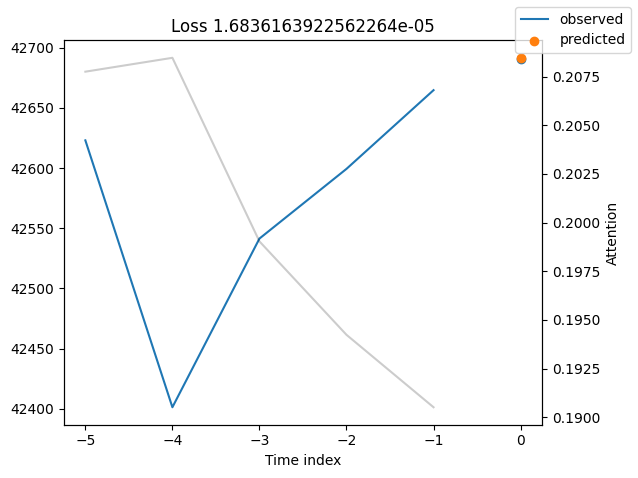

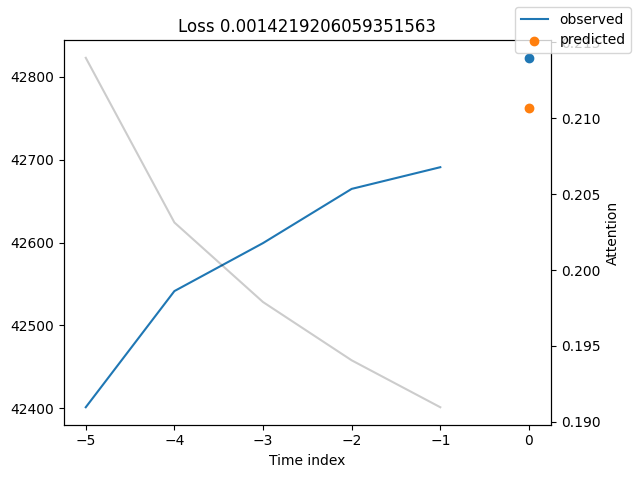

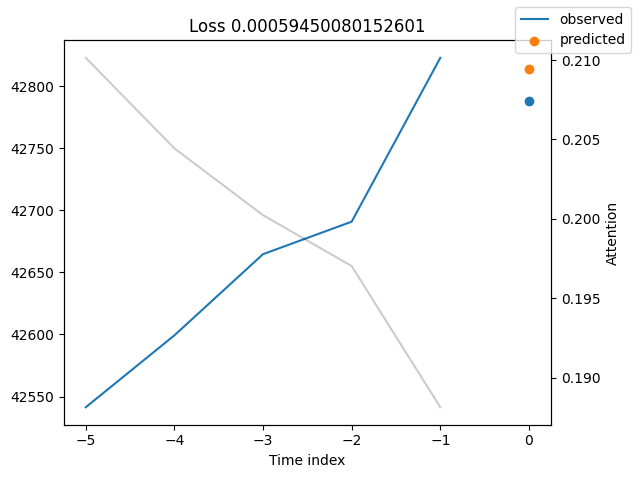

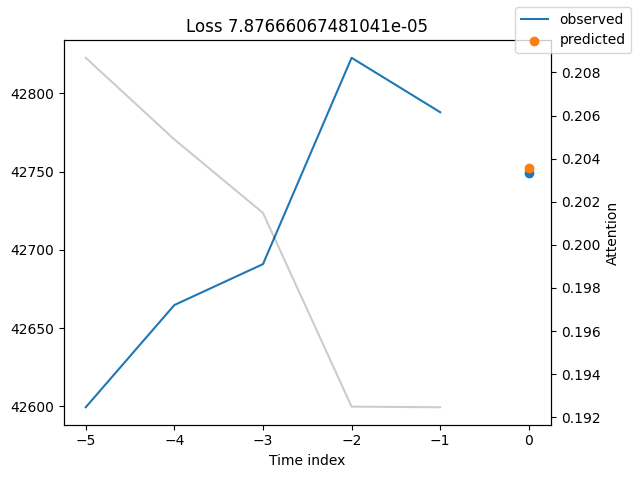

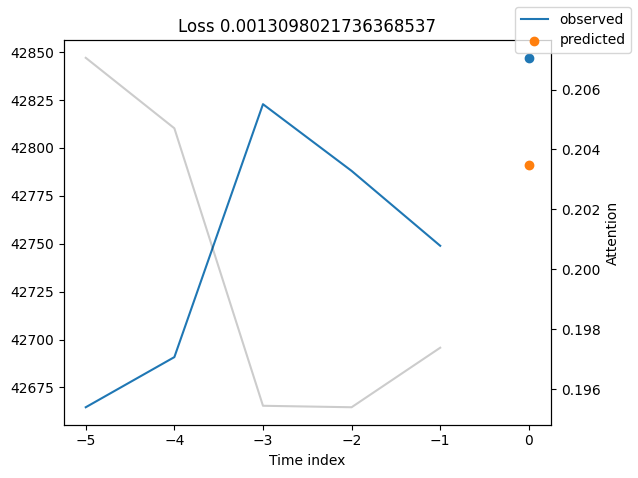

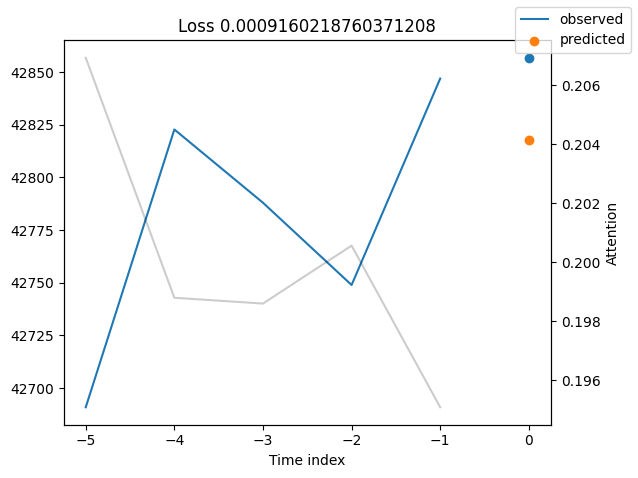

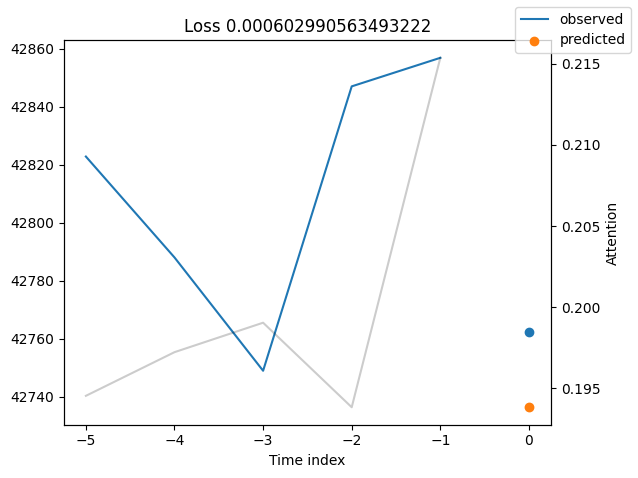

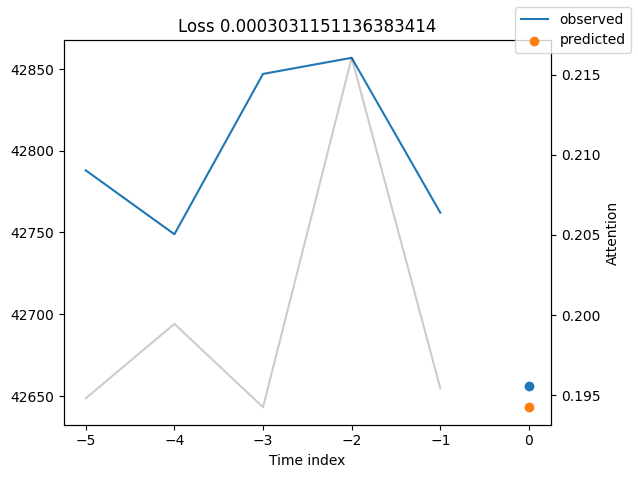

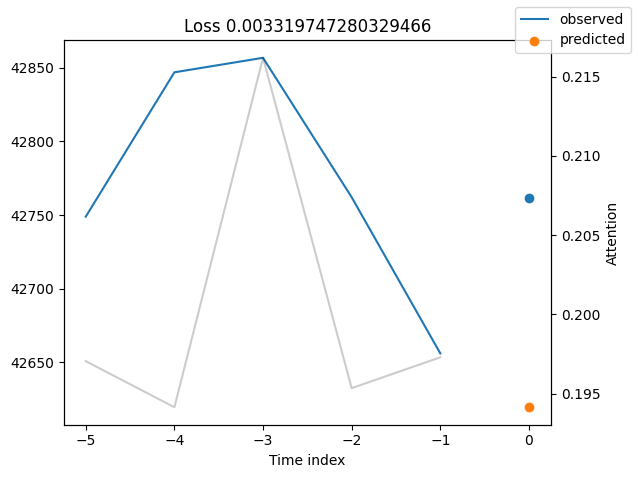

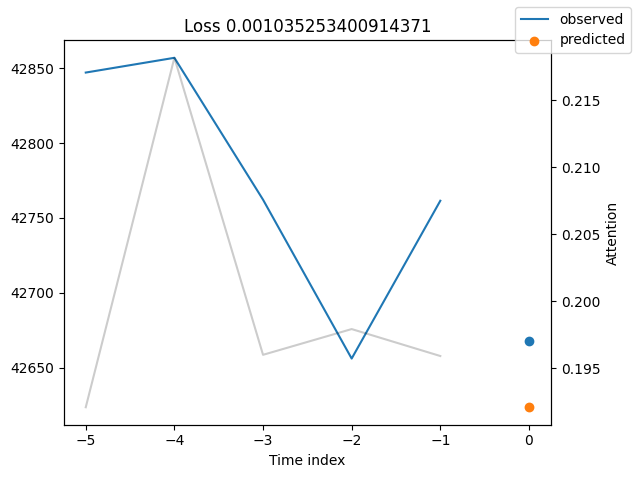

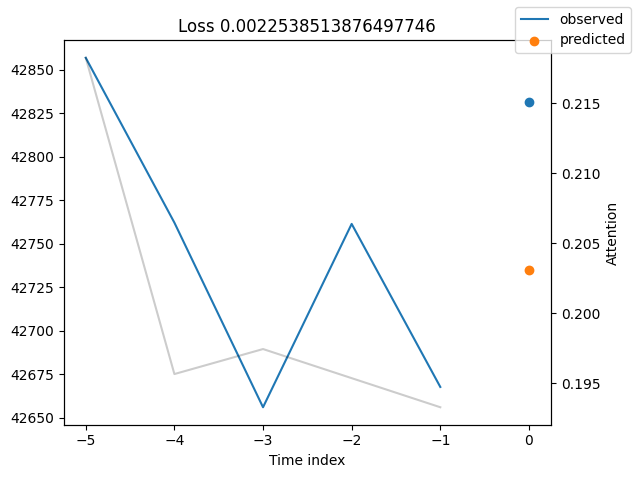

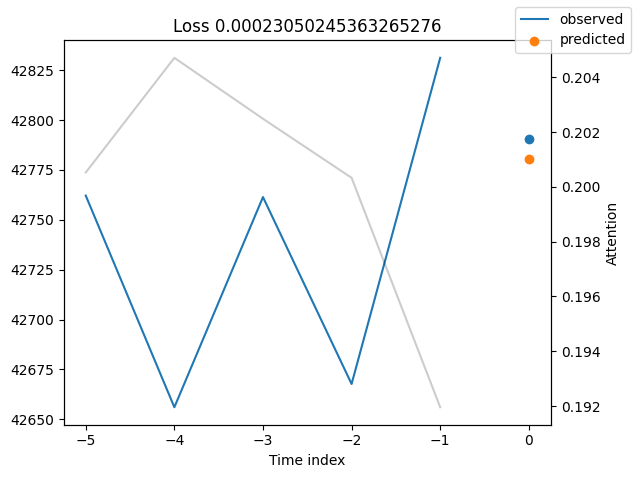

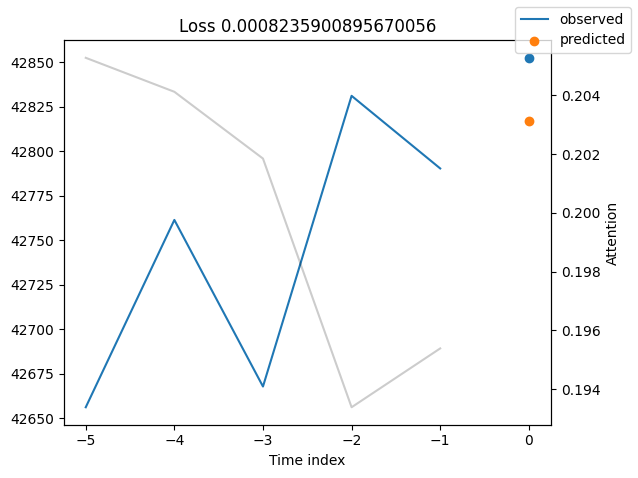

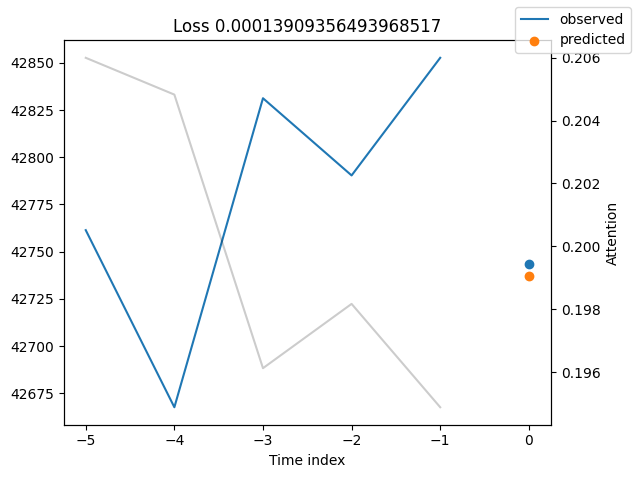

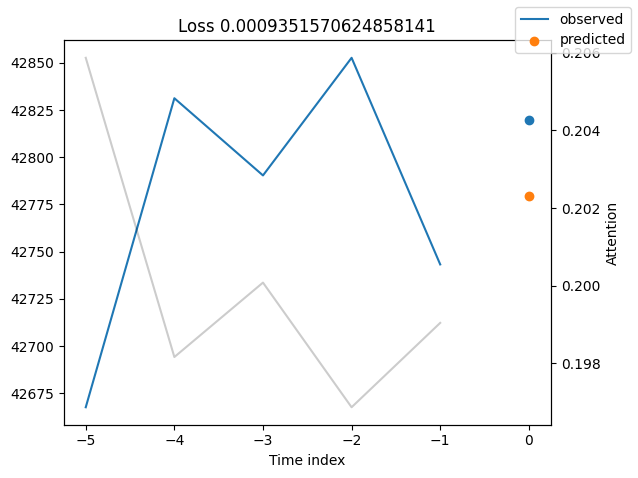

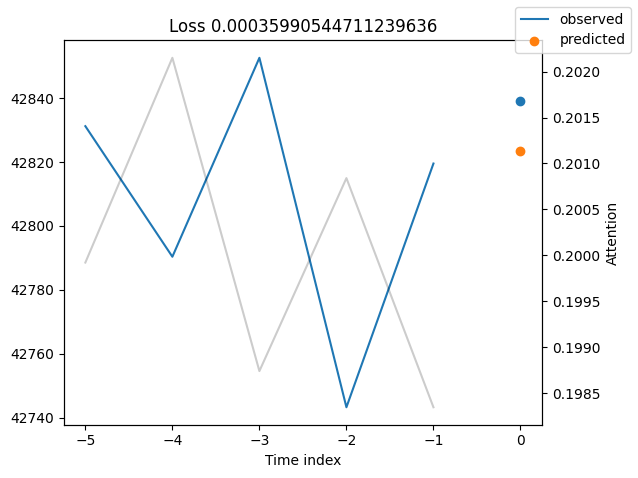

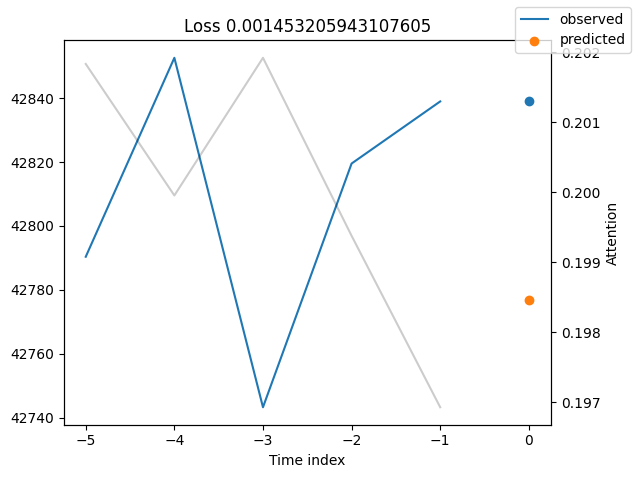

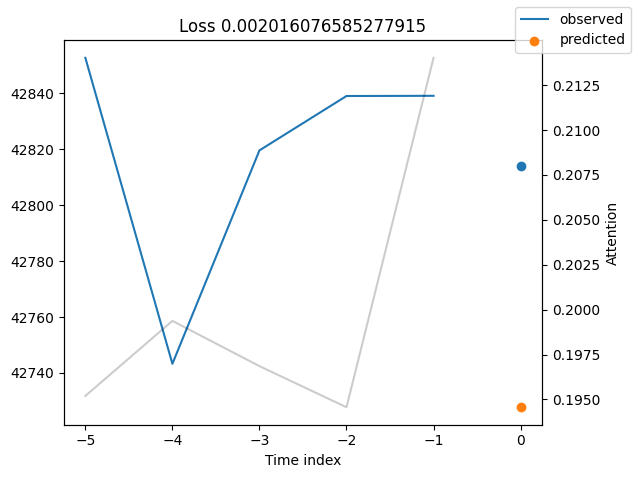

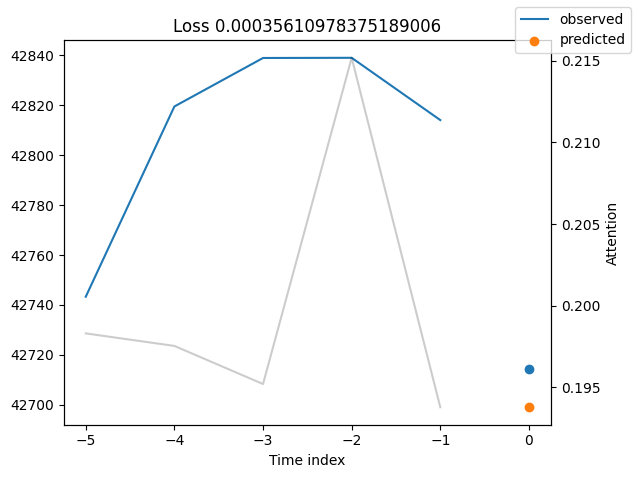

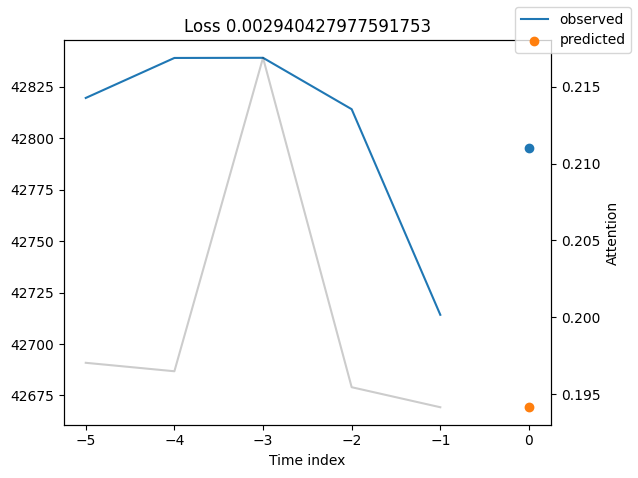

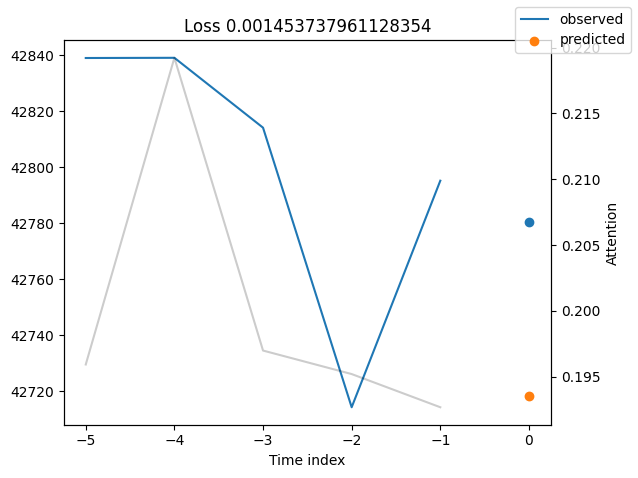

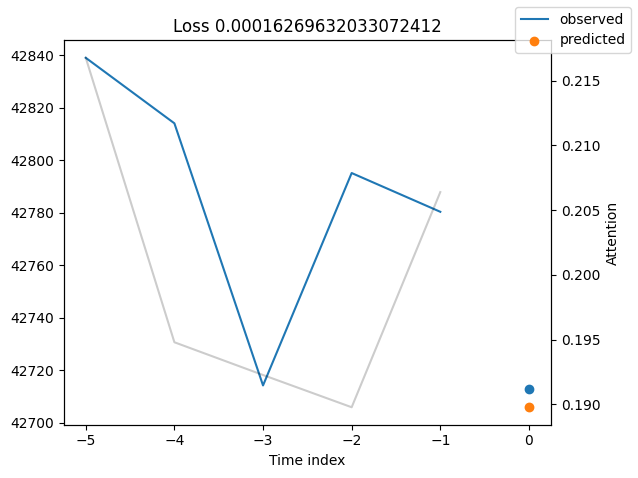

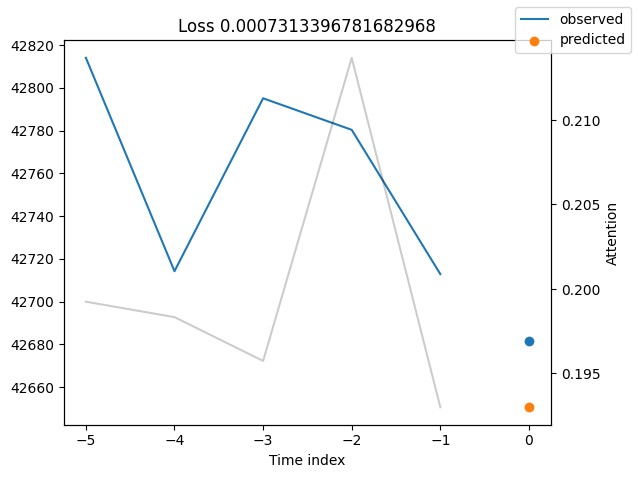

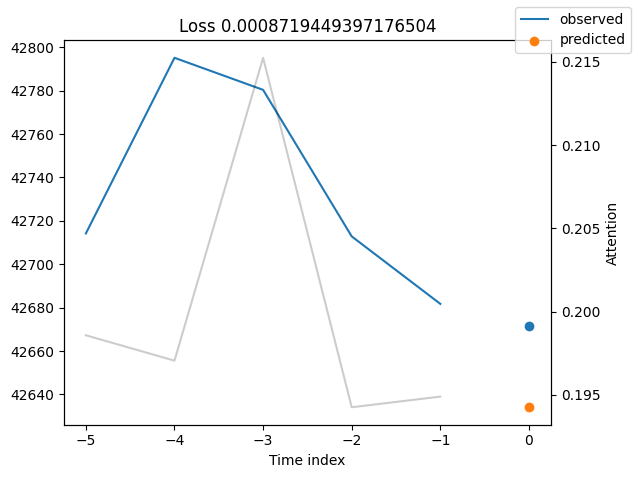

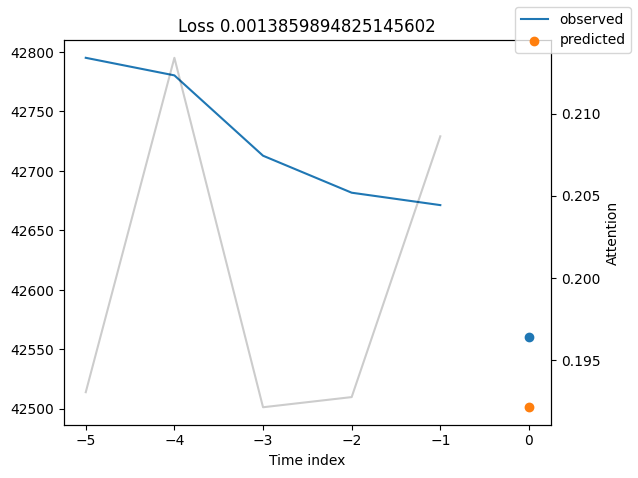

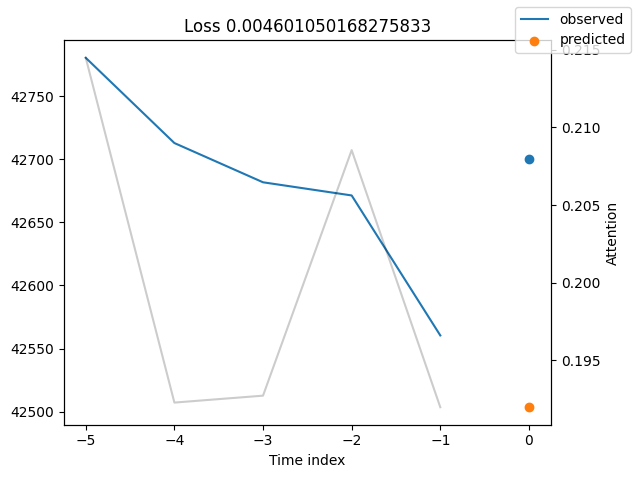

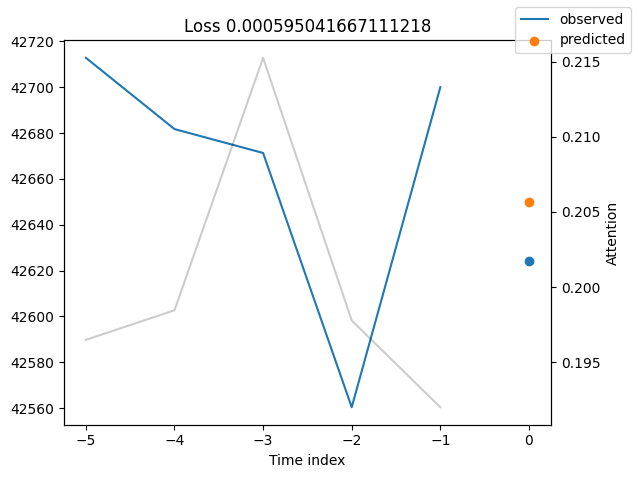

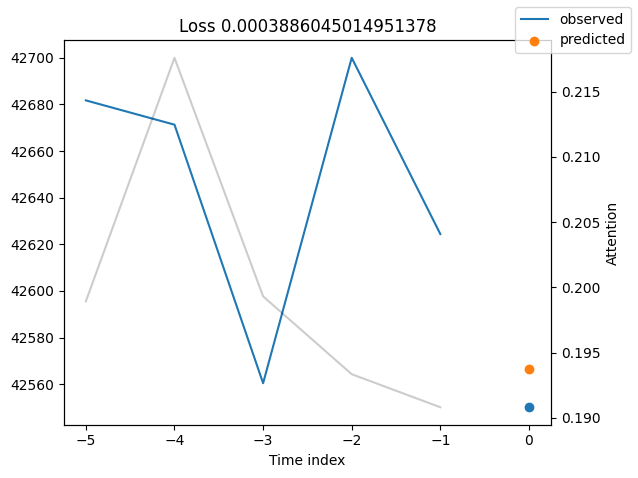

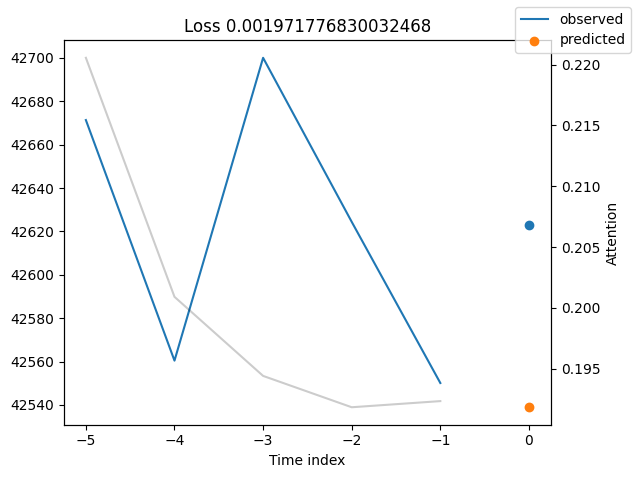

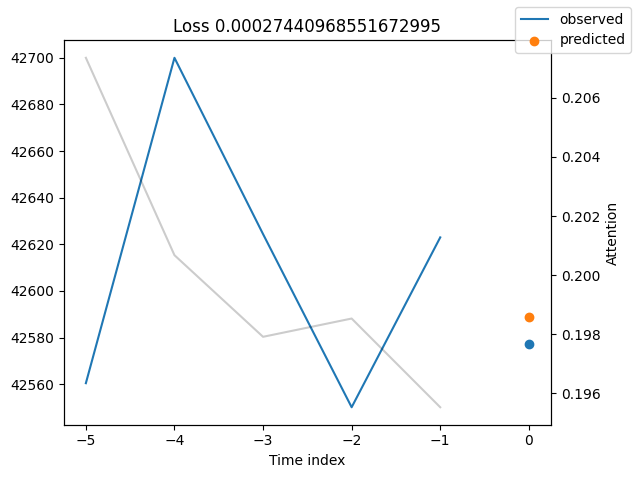

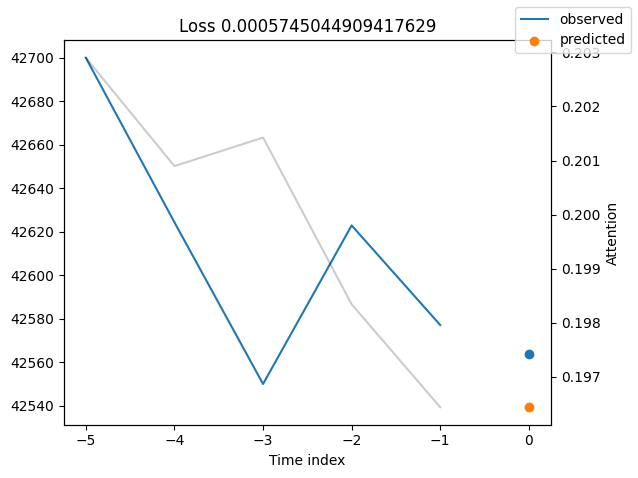

In [14]:

for idx in range(40):  # plot 10 examples
    best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True)

In [25]:
# calcualte metric by which to display
from pytorch_forecasting import SMAPE

predictions = best_tft.predict(val_dataloader, return_y=True)

mean_losses = SMAPE(reduction="none")(predictions.output, predictions.y).mean(1)
indices = mean_losses.argsort(descending=True)  # sort losses
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(
        raw_predictions.x,
        raw_predictions.output,
        idx=indices[idx],
        add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles),
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
d:\Programas\Anaconda\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.


RuntimeError: The size of tensor a (71500) must match the size of tensor b (100) at non-singleton dimension 0

In [ ]:
import torch

torch.save(best_tft.state_dict(), 'marxIA/Transfomer_prices/version1/marxIA_prices.pth')
